# Introduction

This project analyzes data from on-line dating application OKCupid. In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience. These apps give us access to a wealth of information that we've never had before about how different people experience romance.

The goal of this project is to scope, prep, analyze, and create a machine learning model to solve a question.


**Data sources:**

`profiles-trunc.csv` was provided by Codecademy.com.

## Project Goals

In this project, the goal is to apply machine learning techniques to a data set. The primary research question that will be answered is whether an OkCupid's user astrological sign can be predicted using other variables from their profiles. This project is important since many users find astrological signs an important part of matches, and if users don't input their sign, OkCupid would like to predict which sign they might be. 

## Data

The project has one data set called `profiles-trunc.csv`. In the data, each row represents an OkCupid user and the columns are the responses to their user profiles which include multi-choice questions.

## Analysis

This solution will use descriptive statistics and data visualization to find key figures in understanding the distribution, count, and relationship between variables. Since the goal of the project to make predictions on the user's astrological signs, classification algorithms from the supervised learning family of machine learning models will be implemented. 

## Evaluation

The project will conclude with the evaluation of the machine learning model selected with a validation data set. The output of the predictions can be checked through a confusion matrix, and metrics such as accuracy, precision, recall, F1 and Kappa scores. 

## Import Libraries

Let's begin by importing general libraries.

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

plt.rcParams["figure.figsize"] = (5, 5)

import warnings
warnings.filterwarnings('ignore')

## Load the Dataset

We'll use pandas for navigating and working with the dataset in the csv format.

In [4]:
## load the dataset
profiles = pd.read_csv('profiles-trunc.csv')
profiles.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


### Data Characteristics

Such as shape, columns, unique values, etc.

In [5]:
# inspect dimension
profiles.shape

(59946, 21)

It's definitely a huge dataset, with soo many variables.

In [6]:
# inspect columns
columns = profiles.columns
list(columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

The columns in the dataset include: 

- **age:** continuous variable of age of user
- **body_type:** categorical variable of body type of user
- **diet:** categorical variable of dietary information
- **drinks:**  categorical variable of alcohol consumption
- **drugs:** categorical variable of drug usage
- **education:** categorical variable of educational attainment
- **ethnicity:** categorical variable of ethnic backgrounds
- **height:** continuous variable of height of user
- **income:** continuous variable of income of user
- **job:** categorical variable of employment description
- **last_online:** date variable of last login
- **location:** categorical variable of user locations
- **offspring:** categorical variable of children status
- **orientation:** categorical variable of sexual orientation
- **pets:** categorical variable of pet preferences
- **religion:** categorical variable of religious background
- **sex:** categorical variable of gender
- **sign:** categorical variable of astrological symbol
- **smokes:** categorical variable of smoking consumption
- **speaks:** categorical variable of language spoken
- **status:** categorical variable of relationship status

## Explore & Explain the Data

It seems from  the first glance that the categorical variables aren't consistently collected, since we might have different labels refering to the same category, and we need to fix this issue. Also we need to check the distribution and associations between features in order to get some insights about what are those who could potentially be most impactful on our model building phase.

In [7]:
# explore data types and missingness
profiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   ethnicity    54266 non-null  object 
 7   height       59943 non-null  float64
 8   income       59946 non-null  int64  
 9   job          51748 non-null  object 
 10  last_online  59946 non-null  object 
 11  location     59946 non-null  object 
 12  offspring    24385 non-null  object 
 13  orientation  59946 non-null  object 
 14  pets         40025 non-null  object 
 15  religion     39720 non-null  object 
 16  sex          59946 non-null  object 
 17  sign         48890 non-null  object 
 18  smokes       54434 non-null  object 
 19  spea

There missing values that are waiting for us to get handled.

### Continuous Features

Let's explore the distribution of continuous variables, `age`, `height` and `income`.

In [8]:
# list of numerical columns
numerical = ['age', 'height', 'income']

In [9]:
# summary
profiles[numerical].describe()

,age,height,income
count,59946.000000,59943.000000,59946.000000
mean,32.340290,68.295281,20033.222534
std,9.452779,3.994803,97346.192104
min,18.000000,1.000000,-1.000000
25%,26.000000,66.000000,-1.000000
50%,30.000000,68.000000,-1.000000
75%,37.000000,71.000000,-1.000000
max,110.000000,95.000000,1000000.000000


For the `age` variable, the maximum age is 110, which is not normal, the middle age of users is around 30 years old. Moving to the height variable, the minimum value is 1 inch, which is also not normal, neither the maximum which is 95 inches (241 cm !!!). Finally, the income variable, eventhough it doesn't have missing values, notice the value -1 spread across more than 75% of users, this value has no meaning, and we need to consider it as refering to a missing value.

In [10]:
# encode height as int for consistency in the dataset
profiles['height'] = profiles.height.fillna(-1)
profiles['height'] = profiles.height.astype('int64')

In [11]:
# remove outliers from the age and height columns
profiles = profiles.loc[(profiles.age <= 70) & (profiles.height >= 50) & (profiles.height <= 80)]

In [12]:
# isolate the numerical columns for a better visualization
ages = profiles['age']
heights = profiles['height']
incomes = profiles['income'].loc[profiles.income != -1]

series = [ages, heights, incomes]

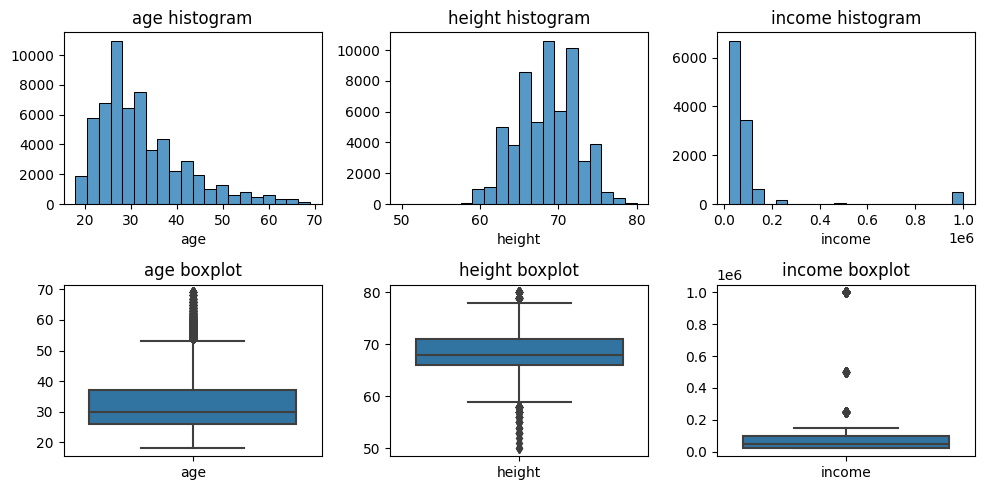

In [13]:
# create our plot
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10, 5))

for i in range(3):
    # create a histogram for the feature
    sns.histplot(ax=axs[0, i], data=series[i], bins=20)
    axs[0, i].set_title(numerical[i] + ' histogram')
    axs[0, i].set_ylabel('')

    # create a boxplot for the feature
    sns.boxplot(ax=axs[1, i], y=series[i])
    axs[1, i].set_title(numerical[i] + ' boxplot')
    axs[1, i].set_xticklabels([numerical[i]])
    axs[1, i].set_ylabel('')

# adjust the spacing between subplots
fig.tight_layout()
plt.show()

The `age` distribution in right skewed, `height` looks  normal, and `income` is a column with an immense range. A more exploration could be done by looking at each measure across some categories.

### Categorical Features

We have many categories to explore !

In [14]:
# list of categorical columns
categorical = ['body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity', 'job', 'location', 'offspring', 'orientation', 'pets', 'religion', 'sex', 'sign', 'smokes', 'speaks', 'status']

# number of distinct values for each category
profiles[categorical].nunique()

body_type        12
diet             18
drinks            6
drugs             3
education        32
ethnicity       217
job              21
location        198
offspring        15
orientation       3
pets             15
religion         45
sex               2
sign             48
smokes            5
speaks         7628
status            5
dtype: int64

`speaks` column has too many classes, we might think that this is due to it being a multi selection question, we aren't going to use it as it's going to make our model building phase too complex. we might do the same thing for ethnicity and location.

In [15]:
# drop the columns with too many classes
profiles.drop(columns=['ethnicity', 'location', 'speaks'], inplace=True)

#### sex

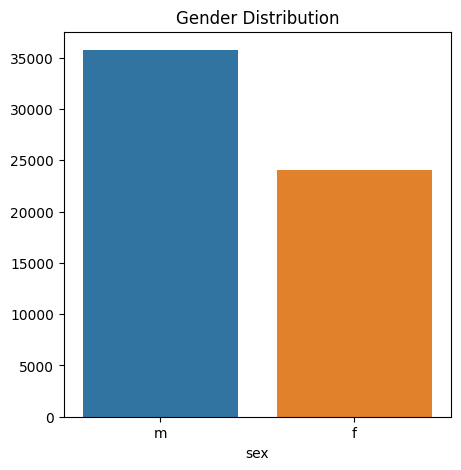

In [16]:
# create a bar chart for gender
ax = sns.countplot(data=profiles, x='sex', order=profiles.sex.value_counts().index)
plt.title('Gender Distribution')
ax.set_ylabel('')
plt.show()

#### body_type

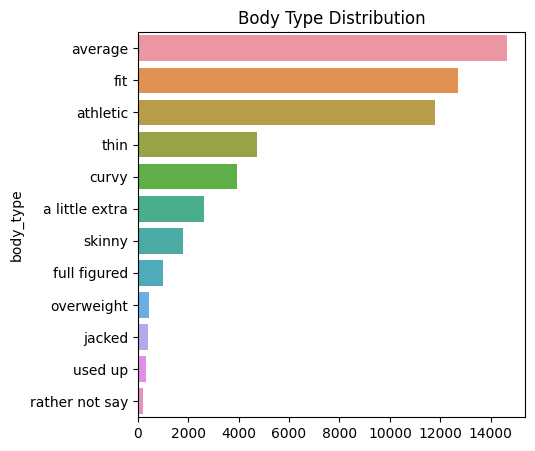

In [17]:
# create a bar chart for body_type
ax = sns.countplot(data=profiles, y='body_type', order=profiles.body_type.value_counts().index)
plt.title('Body Type Distribution')
ax.set_xlabel('')
plt.show()

#### diet

In [18]:
# inspect diet
profiles.diet.value_counts(dropna=False)

NaN                    24340
mostly anything        16558
anything                6177
strictly anything       5105
mostly vegetarian       3442
mostly other            1003
strictly vegetarian      874
vegetarian               667
strictly other           447
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              47
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64

Here, as the diet classes are numerous, we can distinguish 6 main types of diets, which are `anything`, `halal`, `kosher`, `other`, `vegan`, `vegetarian`. Including all the 18 variations will definitely make our problem complex, for fixing this let's modify our variable to regroup the different variations into their main corresponding classes.

In [19]:
classes = ['anything', 'halal', 'kosher', 'other', 'vegan', 'vegetarian']

# add a new column diet_cleaned

profiles['diet_cleaned'] = np.NaN

for diet in classes:
    profiles.loc[(profiles['diet'].str.contains(diet)) & (profiles['diet'].notnull()), 'diet_cleaned'] = diet

profiles.diet_cleaned.value_counts()

anything      27840
vegetarian     4983
other          1781
vegan           702
kosher          115
halal            76
Name: diet_cleaned, dtype: int64

We see that `halal`, `kosher` and `vegan` are minorities, let's put them with the `other` class.

In [20]:
# add a 'other' class for regrouping outliers
profiles.loc[profiles['diet_cleaned'].isin(['halal', 'kosher', 'vegan']), 'diet_cleaned'] = 'other'

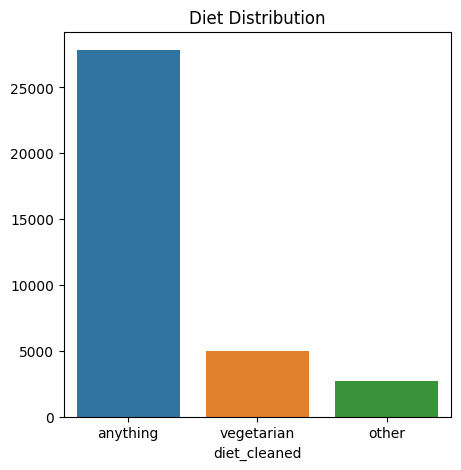

In [21]:
# create a bar chart for diet
ax = sns.countplot(data=profiles, x='diet_cleaned',order=profiles.diet_cleaned.value_counts().index)
plt.title('Diet Distribution')
plt.ylabel('')
plt.show()

#### drinks, drugs and smokes

In [22]:
# inspect drinks
profiles.drinks.value_counts()

socially       41726
rarely          5951
often           5154
not at all      3258
very often       466
desperately      316
Name: drinks, dtype: int64

Here again, 6 classes is a lot, let's minimize that to only 4 classes: `socially`, `often`, `rarely` and `not at all`.

In [23]:
# add a new column drinks_cleaned
profiles['drinks_cleaned'] = profiles.drinks
profiles.loc[profiles['drinks'] == 'very often', 'drinks_cleaned'] = 'often'
profiles.loc[profiles['drinks'] == 'desperately', 'drinks_cleaned'] = 'rarely'

In [24]:
# inspect smokes
profiles.smokes.value_counts()

no                43841
sometimes          3777
when drinking      3030
yes                2221
trying to quit     1477
Name: smokes, dtype: int64

As the no value is dominant, it is safe to regroup all the other classes inside the yes class.

In [25]:
# add a new column smokes_cleaned
profiles['smokes_cleaned'] = profiles.smokes
profiles.loc[(profiles['smokes'] != 'no') & (profiles['smokes'].notnull()), 'smokes_cleaned'] = 'yes'

In [26]:
# inspect drugs
profiles.drugs.value_counts()

never        37662
sometimes     7716
often          400
Name: drugs, dtype: int64

In [27]:
# add a new column drugs_cleaned
profiles['drugs_cleaned'] = profiles.drugs
profiles.loc[profiles['drugs'].isin(['sometimes', 'often']), 'drugs_cleaned'] = 'yes'
profiles.loc[profiles['drugs'] == 'never', 'drugs_cleaned'] = 'no'

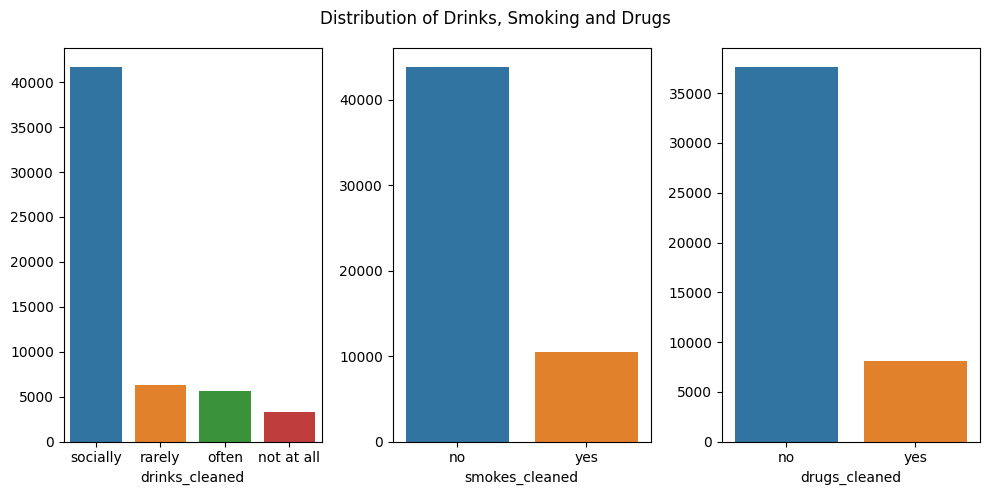

In [28]:
# create bar charts for drinks, smokes and drugs
classes = ['drinks_cleaned', 'smokes_cleaned', 'drugs_cleaned']

fig, axs = plt.subplots(ncols=3, figsize=(10, 5))

for i in range(3):
    sns.countplot(data=profiles, x=classes[i], order=profiles[classes[i]].value_counts().index, ax=axs[i])
    axs[i].set_ylabel('')

plt.suptitle('Distribution of Drinks, Smoking and Drugs')
plt.tight_layout()
plt.show()

#### education & job

In [29]:
# inspect education
profiles.education.value_counts()

graduated from college/university    23935
graduated from masters program        8954
working on college/university         5704
working on masters program            1682
graduated from two-year college       1529
graduated from high school            1420
graduated from ph.d program           1269
graduated from law school             1120
working on two-year college           1070
dropped out of college/university      995
working on ph.d program                982
college/university                     797
graduated from space camp              652
dropped out of space camp              517
graduated from med school              446
working on space camp                  443
working on law school                  268
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        135
dropped out of ph.d program            126
dropped out

The main programs are:
- college/university
- high school
- law school
- masters program
- med school
- ph.d program
- space camp
- two-year college

Let's modify our column to only have these main programs, in order to lower the complexity, since the model contains many features.

In [30]:
classes = ['college/university', 'high school', 'law school', 'masters program', 'med school', 'ph.d program', 'space camp', 'two-year college']

# add new column education_cleaned

profiles['education_cleaned'] = profiles.education

for class_ in classes:
    profiles.loc[(profiles['education'].str.contains(class_)) & (profiles['education'].notnull()), 'education_cleaned'] = class_

In [31]:
profiles.job.value_counts()

other                                7578
student                              4869
science / tech / engineering         4843
computer / hardware / software       4702
artistic / musical / writer          4430
sales / marketing / biz dev          4389
medicine / health                    3679
education / academia                 3509
executive / management               2369
banking / financial / real estate    2265
entertainment / media                2243
law / legal services                 1379
hospitality / travel                 1362
construction / craftsmanship         1019
clerical / administrative             805
political / government                705
rather not say                        433
transportation                        365
unemployed                            272
retired                               249
military                              201
Name: job, dtype: int64

Following up with the same appraoch.

In [32]:
list(profiles.job.unique())

['transportation',
 'hospitality / travel',
 nan,
 'student',
 'artistic / musical / writer',
 'computer / hardware / software',
 'banking / financial / real estate',
 'entertainment / media',
 'sales / marketing / biz dev',
 'other',
 'medicine / health',
 'science / tech / engineering',
 'executive / management',
 'education / academia',
 'clerical / administrative',
 'construction / craftsmanship',
 'rather not say',
 'political / government',
 'law / legal services',
 'unemployed',
 'military',
 'retired']

In [33]:
classes = {
    'student': [
        'student'
    ], 
    'business/finance': [
        'banking / financial / real estat', 
        'sales / marketing / biz dev', 
        'executive / management'
    ], 
    'science/technology/engineering': [
        'computer / hardware / software',
        'science / tech / engineering'
    ], 
    'arts/culture/media': [
        'artistic / musical / writer',
        'entertainment / media'
    ], 
    'healthcare': [
        'medicine / health'
    ], 
    'education': [
        'education / academia'
    ], 
    'clerical/administrative': [
        'clerical / administrative'
    ], 
    'construction': [
        'construction / craftsmanship'
    ], 
    'government/politics/law': [
        'political / government', 
        'law / legal services',
        'military'
    ], 
    'transport/tourism': [
        'transportation', 
        'hospitality / travel',
    ], 
    'other': [  
        'other', 
        'rather not say', 
        'unemployed', 
        'retired'
    ]
}

In [34]:
# add new column job_cleaned

profiles['job_cleaned'] = profiles.job

for supclass in classes.keys():
    for subclass in classes[supclass]:
        profiles.loc[(profiles['job'].str.contains(subclass)) & (profiles['job'].notnull()), 'job_cleaned'] = supclass

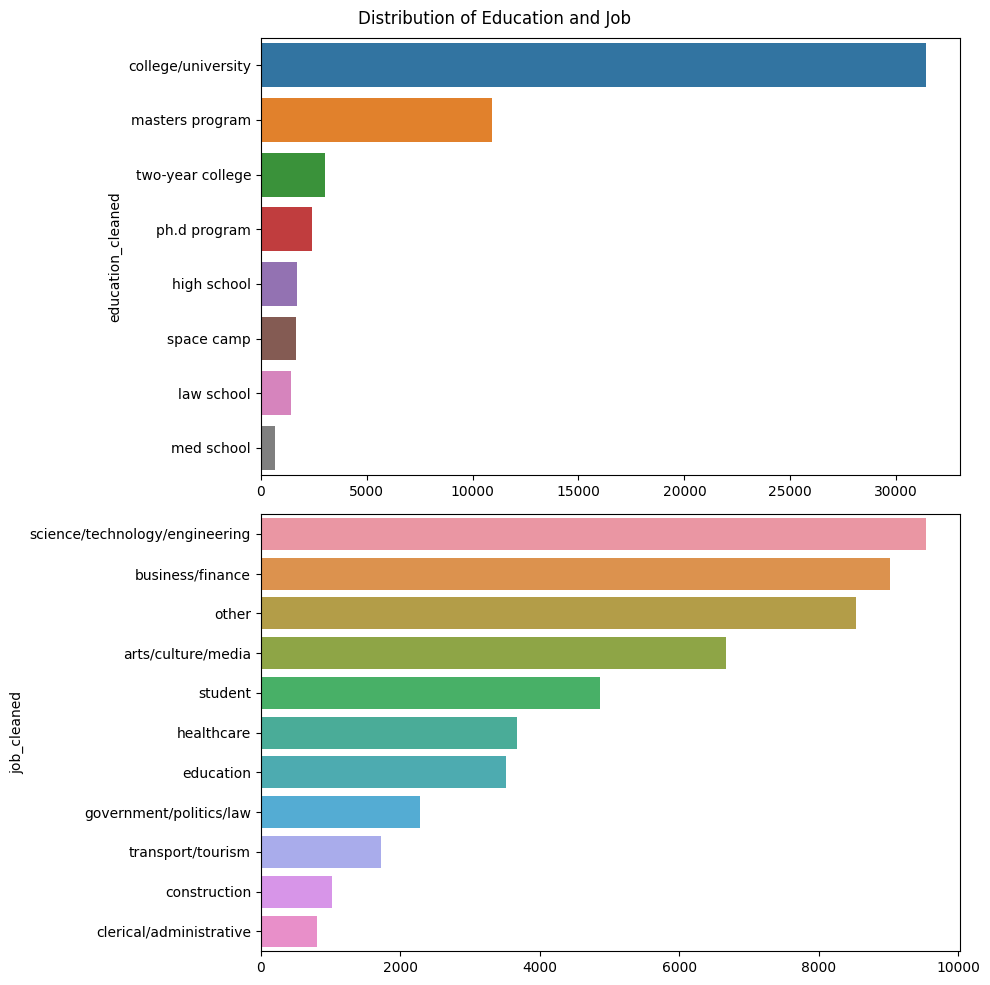

In [35]:
# create bar charts for education and job
classes = ['education_cleaned', 'job_cleaned']

fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

for i in range(2):
    sns.countplot(data=profiles, y=classes[i], order=profiles[classes[i]].value_counts().index, ax=axs[i])
    axs[i].set_xlabel('')

plt.suptitle('Distribution of Education and Job')
plt.tight_layout()
plt.show()

#### offspring and pets

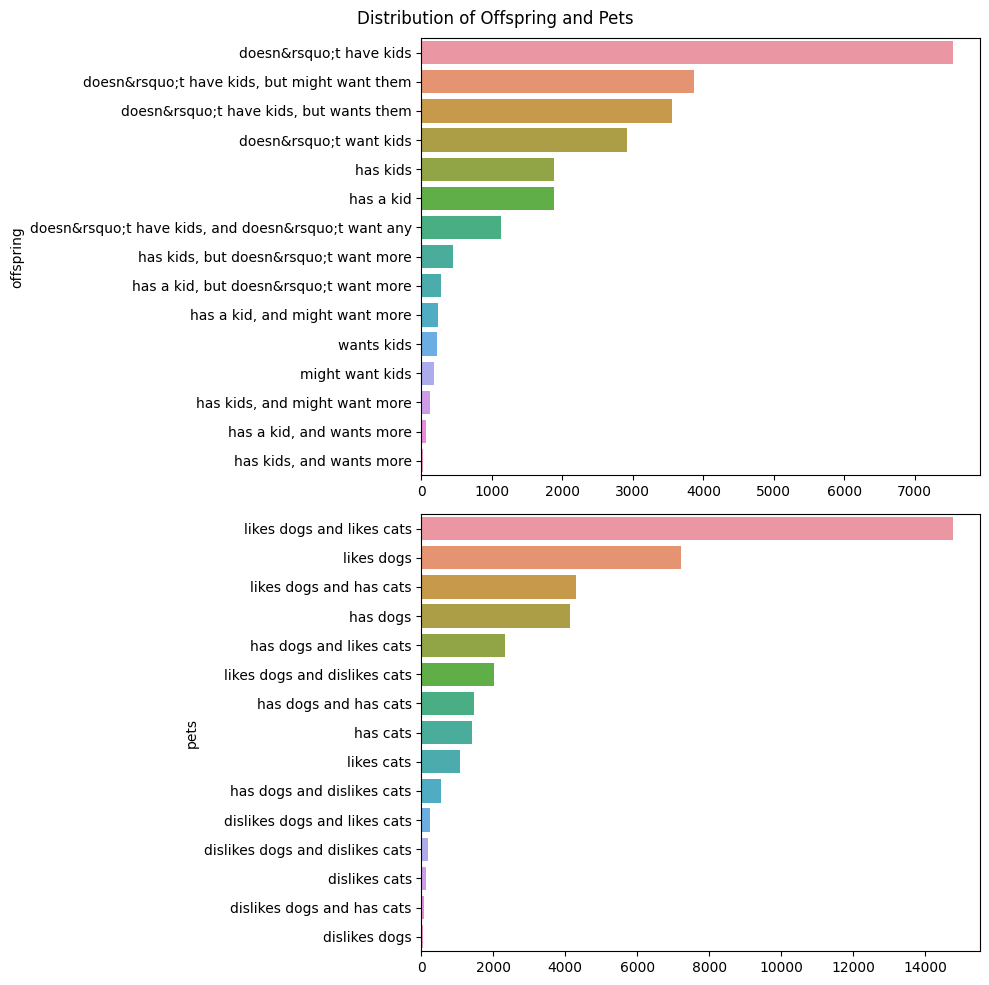

In [36]:
# create bar charts for offspring and pets
classes = ['offspring', 'pets']

fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

for i in range(2):
    sns.countplot(data=profiles, y=classes[i], order=profiles[classes[i]].value_counts().index, ax=axs[i])
    axs[i].set_xlabel('')

plt.suptitle('Distribution of Offspring and Pets')
plt.tight_layout()
plt.show()

Notice the variety of options and combinations. Note also that the vast majority of users don't have kids, we might think of dropping this column as it doesn't bring valuable information.

#### orientation and status

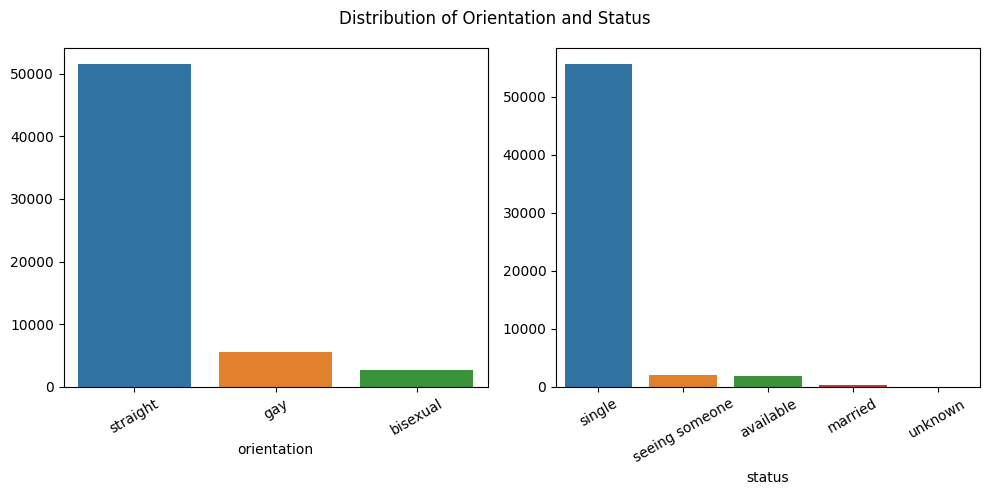

In [37]:
# create bar charts for offspring and pets
classes = ['orientation', 'status']

fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

for i in range(2):
    sns.countplot(data=profiles, x=classes[i], order=profiles[classes[i]].value_counts().index, ax=axs[i])
    axs[i].set_ylabel('')
    axs[i].tick_params(axis='x', rotation=30)

plt.suptitle('Distribution of Orientation and Status')
plt.tight_layout()
plt.show()

#### religion and sign

In [38]:
# inspect religion
profiles.religion.value_counts()

agnosticism                                   2722
other                                         2688
agnosticism but not too serious about it      2634
agnosticism and laughing about it             2491
catholicism but not too serious about it      2316
atheism                                       2174
other and laughing about it                   2111
atheism and laughing about it                 2069
christianity                                  1953
christianity but not too serious about it     1948
other but not too serious about it            1551
judaism but not too serious about it          1516
atheism but not too serious about it          1318
catholicism                                   1062
christianity and somewhat serious about it     926
atheism and somewhat serious about it          848
other and somewhat serious about it            844
catholicism and laughing about it              726
judaism and laughing about it                  679
buddhism but not too serious ab

That is just a lot !!!  
It's going to be very useful to take just the first word of each class as being the religion regardless of the follow up statement.

In [39]:
# add a new column religion_cleaned
profiles['religion_cleaned'] = profiles['religion'].str.split().str.get(0)

In [40]:
# inspect sign
profiles.sign.value_counts()

gemini and it&rsquo;s fun to think about         1781
scorpio and it&rsquo;s fun to think about        1769
leo and it&rsquo;s fun to think about            1688
libra and it&rsquo;s fun to think about          1645
taurus and it&rsquo;s fun to think about         1639
cancer and it&rsquo;s fun to think about         1596
pisces and it&rsquo;s fun to think about         1590
sagittarius and it&rsquo;s fun to think about    1582
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1570
aquarius and it&rsquo;s fun to think about       1502
virgo but it doesn&rsquo;t matter                1495
leo but it doesn&rsquo;t matter                  1455
cancer but it doesn&rsquo;t matter               1452
gemini but it doesn&rsquo;t matter               1451
taurus but it doesn&rsquo;t matter               1446
libra but it doesn&rsquo;t matter                1406
aquarius but it doesn&rsquo;t matter             1406
capricorn and it&rsquo;s fun

Let's do the same thing here and get the first word refering to the zodiac sign of a user.

In [41]:
# add a new column sign_cleaned
profiles['sign_cleaned'] = profiles['sign'].str.split().str.get(0)

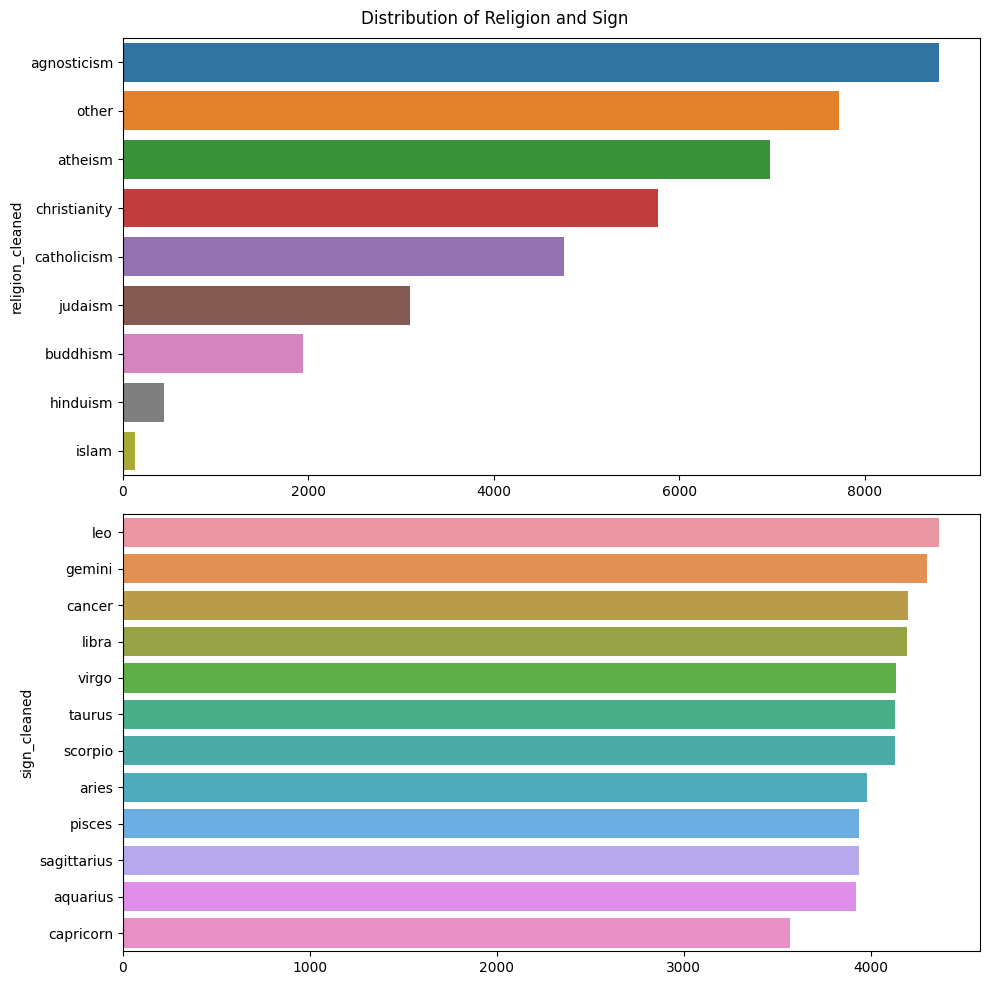

In [42]:
# create bar charts for religion and sign
classes = ['religion_cleaned', 'sign_cleaned']

fig, axs = plt.subplots(nrows=2, figsize=(10, 10))

for i in range(2):
    sns.countplot(data=profiles, y=classes[i], order=profiles[classes[i]].value_counts().index, ax=axs[i])
    axs[i].set_xlabel('')
    # axs[i].tick_params(axis='x', rotation=30)

plt.suptitle('Distribution of Religion and Sign')
plt.tight_layout()
plt.show()

Looking at the distribution of signs, we see that there isn't a significant difference in the occurence of classes, meaning that indeed this category could be used as a target variable in our classification problem.

In [43]:
# final preview at the columns
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'height',
 'income',
 'job',
 'last_online',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'status',
 'diet_cleaned',
 'drinks_cleaned',
 'smokes_cleaned',
 'drugs_cleaned',
 'education_cleaned',
 'job_cleaned',
 'religion_cleaned',
 'sign_cleaned']

In [44]:
# keep only the clean and relevant columns in our dataset
profiles = profiles[['age', 'height', 'income', 'body_type', 'sex', 'diet_cleaned', 'drinks_cleaned', 'smokes_cleaned', 'drugs_cleaned', 'education_cleaned', 'job_cleaned', 'orientation', 'pets', 'religion_cleaned', 'status', 'sign_cleaned']]

The target variable contains a small amount of missing values that we need to get rid off.

In [45]:
# drop missing values on the sign column
profiles.dropna(subset=['sign_cleaned'], inplace=True)

### Exploring Associations

We are going to dig a bit deeper and look at different associations between our target variable `sign` and the other features, in order to determine which ones explain it the most.

For this we might look at the distribution of each numerical feature across each category of the `sign` variable, or if we want to process faster, we can run some statistical tests such as the ANOVA test and then make a decision.

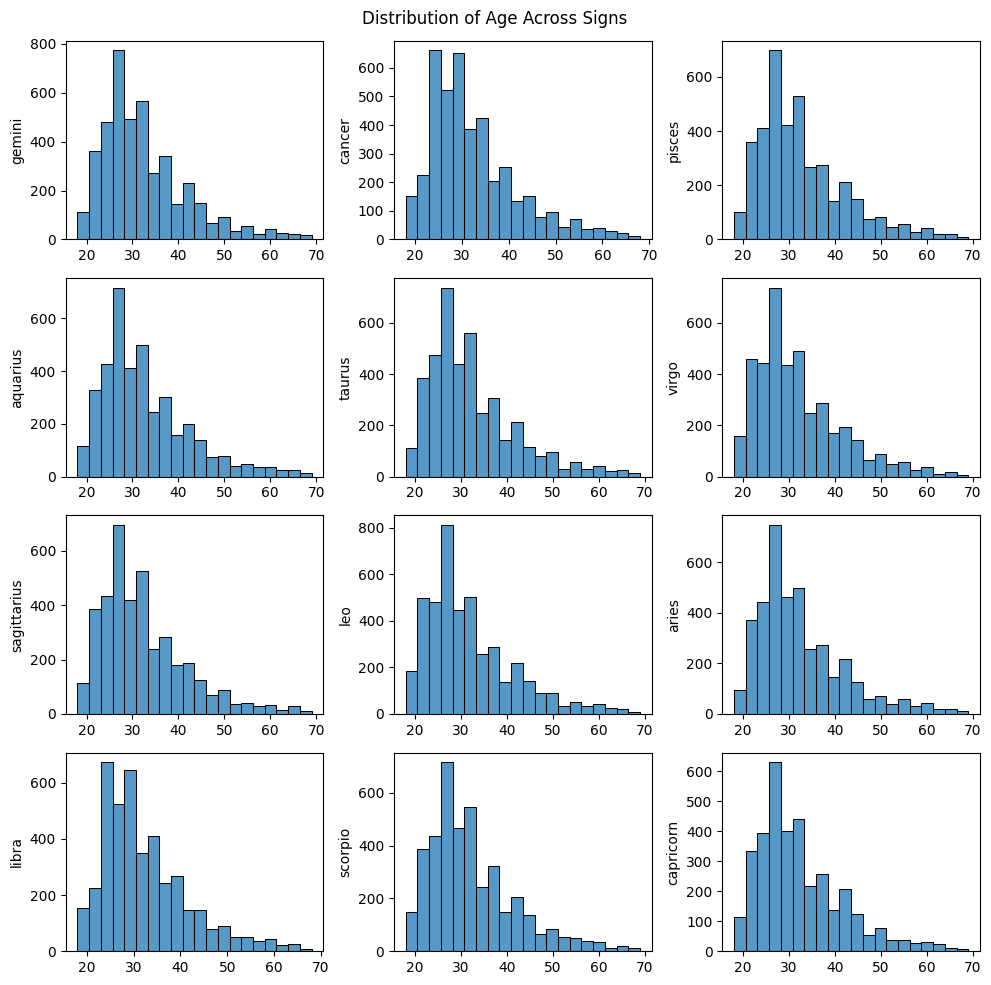

In [46]:
# sign and height
signs = profiles['sign_cleaned'].unique()

# create the figure
fig, axs = plt.subplots(nrows=4, ncols=3, figsize=(10, 10))

# loop through every sign class
for i, sign in enumerate(signs):
    # create the histogram of age across the current class
    row = i // 3
    col = i % 3
    data = profiles.loc[profiles['sign_cleaned'] == sign]
    sns.histplot(data=data, x='age', ax=axs[row, col], bins=20)
    axs[row, col].set_xlabel('')
    axs[row, col].set_ylabel(sign)

# add title, adjust the spacing and show the plot
plt.suptitle('Distribution of Age Across Signs')
plt.tight_layout()
plt.show()


Looking at these graphs, the distributions look exactly the same, with very minor differences, so we can confidently state that the `age` variable doesn't explain significantly our target `sign` variable.  
With the other two numerical variables, `height` and `income`, we will use the ANOVA test.

In [47]:
# import the anova function from scipy
from scipy.stats import f_oneway

def anova_test(column):
    # create the data list
    data = []
    for sign in signs:
        # append each distribution to the data as a separate group
        group = profiles.loc[profiles['sign_cleaned'] == sign][column]
        data.append(group)
    # start anova test and using * to unpack the data for getting the groups
    fstat, pval = f_oneway(*data)
    return pval

In [48]:
round(anova_test('income'), 4)

0.1559

`income` also won't be used since it doesn't affect `sign` significantly.

In [49]:
round(anova_test('height'), 4)

0.0141

Let's explore here a little deeper, with the tukey test to see which groups are different from each others.

In [50]:
# tuckey test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(profiles['height'], profiles['sign_cleaned'])
print(tukey)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
   group1      group2   meandiff p-adj   lower  upper  reject
-------------------------------------------------------------
   aquarius       aries  -0.1602 0.7887 -0.4429 0.1225  False
   aquarius      cancer   0.1055 0.9862 -0.1735 0.3845  False
   aquarius   capricorn  -0.1777  0.695 -0.4684  0.113  False
   aquarius      gemini   0.0524    1.0  -0.225 0.3298  False
   aquarius         leo   0.0886 0.9966 -0.1879  0.365  False
   aquarius       libra  -0.0072    1.0 -0.2862 0.2719  False
   aquarius      pisces  -0.0384    1.0 -0.3219  0.245  False
   aquarius sagittarius  -0.1079 0.9854 -0.3914 0.1756  False
   aquarius     scorpio  -0.0228    1.0  -0.303 0.2574  False
   aquarius      taurus   0.0165    1.0 -0.2637 0.2966  False
   aquarius       virgo   0.0114    1.0 -0.2687 0.2914  False
      aries      cancer   0.2657 0.0768 -0.0122 0.5436  False
      aries   capricorn  -0.0175    1.0 -0.3072 0.2722  False
      ar

c:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\integrate\_quadpack_py.py:1151: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,


Eventhough the ANOVA test's result suggests that there may be a major difference among `sign` classes for the `height`, the tukey test shows that the mean differences aren't actually significant, so we can also drop this column.

In [51]:
# drop numerical features
profiles.drop(columns=['age', 'income', 'height'], inplace=True)

In [52]:
profiles.rename(columns={
    'diet_cleaned': 'diet',
    'drinks_cleaned': 'drinks',
    'smokes_cleaned': 'smokes',
    'drugs_cleaned': 'drugs',
    'education_cleaned': 'education',
    'job_cleaned': 'job',
    'religion_cleaned': 'religion',
    'sign_cleaned': 'sign'
}, inplace=True)

Looking at our categories, two could be highly associated with each others, `education` and `job`, let's explore this association with a chi-square test.

In [53]:
from scipy.stats import chi2_contingency

def chi2_test(col1, col2):
    Xtab = pd.crosstab(profiles[col1], profiles[col2])
    chi2, pval, dof, expected = chi2_contingency(Xtab)
    return chi2, pval

chi2_test('education', 'job')

(17631.356686583582, 0.0)

The chi2 statistic is extremely high compared to the dimension of the cross table, the p-value is so low it became null, emphasizing on the strength of the association between the two variables.  
This being said, if we include both features in our model, we are only going to make information redundunt, we better keep `job` since most users are actually workers and not students.

In [54]:
# drop education column
profiles.drop(columns=['education'], inplace=True)

Let's do the same with `drinks`, `smokes` and `drugs`.

In [55]:
print(chi2_test('drinks', 'smokes'))
print(chi2_test('drinks', 'drugs'))
print(chi2_test('smokes', 'drugs'))

(1418.8325721924039, 2.4134204173312318e-307)
(2065.2541373927297, 0.0)
(4208.322795804137, 0.0)


Since all of these features are highly associated, we can allow ourselves to keep only one, let it be drinks, because it has more classes, and it'll keep the variance higher, after all we don't want to oversiplify the model.

In [56]:
profiles.drop(columns=['smokes', 'drugs'], inplace=True)

### Handling Missing Values

For each category, let's look at the distribution of missing values, for deciding on what to do about it.

In [57]:
# shape preview
profiles.shape

(48810, 10)

In [58]:
# list of categories
categorical = list(profiles.columns)

# remove target category
categorical.pop()
categorical

['body_type',
 'sex',
 'diet',
 'drinks',
 'job',
 'orientation',
 'pets',
 'religion',
 'status']

The process will be to group the dataset by `sign`, and count the total of missing values for each category on each group, look at the result distribution, and see if missing values contribute in the target.

In [59]:
profiles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48810 entries, 0 to 59945
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   body_type    44882 non-null  object
 1   sex          48810 non-null  object
 2   diet         30077 non-null  object
 3   drinks       47292 non-null  object
 4   job          43862 non-null  object
 5   orientation  48810 non-null  object
 6   pets         35115 non-null  object
 7   religion     34702 non-null  object
 8   status       48810 non-null  object
 9   sign         48810 non-null  object
dtypes: object(10)
memory usage: 4.1+ MB


There are features with no missing values, we will exclude them in perform our analysis.

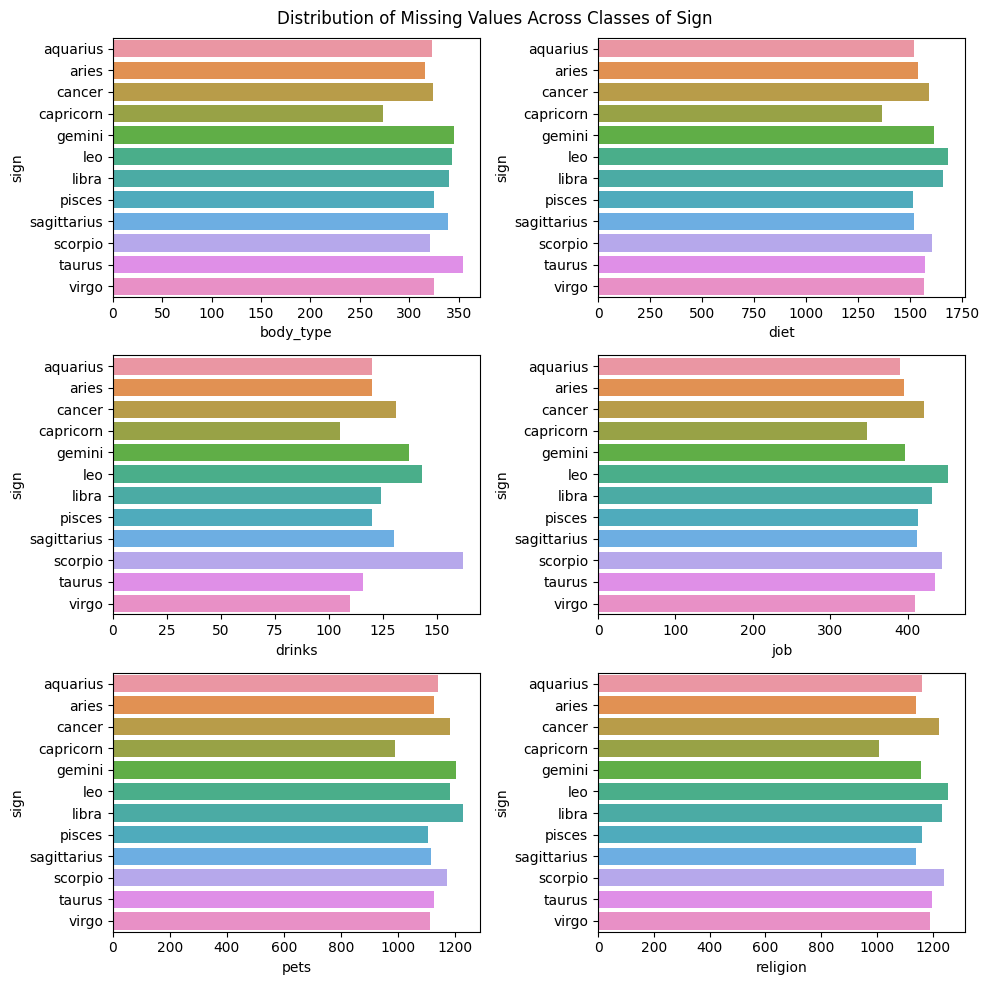

In [60]:
# create figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 10))

# loop through categories with missing values
for i, category in enumerate(['body_type', 'diet', 'drinks', 'job', 'pets', 'religion']):
    # count of missing values by sign
    df = profiles.groupby('sign')[category].apply(lambda x: x.isnull().sum()).reset_index()

    # create graph
    row = i // 2
    col = i % 2
    sns.barplot(data=df, x=category, y='sign', ax=axs[row, col])

# adjust the graph
plt.suptitle('Distribution of Missing Values Across Classes of Sign')
plt.tight_layout()
plt.show()


Now this is interesting, we see that missing values, for all our features, are the same across the different classes of our target variable `sign`, this is due to the fact that our dataset is large, which is making our life easier, we only need to drop every row with a missing value.

In [61]:
# drop rows with missing values in any column
profiles.dropna(inplace=True)

# preview at the shape
profiles.shape

(16234, 10)

## Build ML Model

Everything is ready for building the model.  
We are dealing with a supervised classification problem, and we need to try different classification algorithms in order to determine which one is the most efficient, learns the best from our dataset, and have the best predictive power.
1. *Logistic Regression*
2. *K Nearest Neighbors*
3. *Decision Trees*
4. *Random Forests*
5. *SVM*

### One Hot Encoding

In [62]:
# perform one hot encoding
for col in categorical:
    profiles = pd.get_dummies(profiles, columns=[col], prefix=[col])

In [63]:
profiles.head()

,sign,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,religion_christianity,religion_hinduism,religion_islam,religion_judaism,religion_other,status_available,status_married,status_seeing someone,status_single,status_unknown
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train Test Split

Of course, the first thing to do is to prepare our training and testing datasets.

In [64]:
from sklearn.model_selection import train_test_split

x = profiles.iloc[:, 1:]
y = profiles.iloc[:, 0:1]

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=.75, random_state=0)

y_train = y_train.to_numpy()[:, 0]
y_test = y_test.to_numpy()[:, 0]

### Logistic Regression

The first classification algorithm to use is the logistic regression.

In [65]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class="multinomial", max_iter=200)
lr.fit(x_train, y_train)
lr_pred = lr.predict(x_train)

In [66]:
from sklearn.metrics import classification_report

print(classification_report(y_train, lr_pred))

              precision    recall  f1-score   support

    aquarius       0.10      0.03      0.05       915
       aries       0.10      0.06      0.08       981
      cancer       0.11      0.16      0.13      1068
   capricorn       0.10      0.04      0.06       875
      gemini       0.11      0.15      0.12      1119
         leo       0.11      0.22      0.15      1142
       libra       0.11      0.09      0.10       996
      pisces       0.12      0.13      0.12       954
 sagittarius       0.12      0.11      0.12       970
     scorpio       0.12      0.09      0.10      1019
      taurus       0.12      0.10      0.11      1049
       virgo       0.13      0.17      0.15      1087

    accuracy                           0.12     12175
   macro avg       0.11      0.11      0.11     12175
weighted avg       0.11      0.12      0.11     12175



The performance of this model is awful, notice the 12% accuracy, we cannot rely on it even if we tune different hyperparameters it wouldn't get significantly better, let's try another algorithm instead.

### K Nearest Neighbors

In [67]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_train)

In [68]:
print(classification_report(y_train, knn_pred))

              precision    recall  f1-score   support

    aquarius       0.24      0.63      0.35       915
       aries       0.26      0.50      0.34       981
      cancer       0.32      0.43      0.37      1068
   capricorn       0.35      0.32      0.33       875
      gemini       0.33      0.31      0.32      1119
         leo       0.36      0.30      0.33      1142
       libra       0.41      0.23      0.30       996
      pisces       0.38      0.25      0.30       954
 sagittarius       0.41      0.22      0.28       970
     scorpio       0.40      0.23      0.29      1019
      taurus       0.39      0.23      0.29      1049
       virgo       0.42      0.25      0.31      1087

    accuracy                           0.32     12175
   macro avg       0.35      0.33      0.32     12175
weighted avg       0.36      0.32      0.32     12175



This algorithm proves to be better than the previous one, there is a significant increase in the accuracy which is now 32%, we can later on work on hyperparameters if the model is proved to be the best among all.

### Decision Trees

In [69]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_train)

In [70]:
print(classification_report(y_train, dt_pred))

              precision    recall  f1-score   support

    aquarius       0.59      0.89      0.71       915
       aries       0.65      0.83      0.73       981
      cancer       0.65      0.82      0.72      1068
   capricorn       0.72      0.78      0.75       875
      gemini       0.69      0.75      0.71      1119
         leo       0.73      0.74      0.74      1142
       libra       0.75      0.72      0.73       996
      pisces       0.77      0.67      0.72       954
 sagittarius       0.84      0.66      0.74       970
     scorpio       0.85      0.62      0.72      1019
      taurus       0.87      0.65      0.75      1049
       virgo       0.85      0.64      0.73      1087

    accuracy                           0.73     12175
   macro avg       0.75      0.73      0.73     12175
weighted avg       0.75      0.73      0.73     12175



It starts getting better, now the accuracy reached 73%.  
Note that these scores are calculated based on the training set, so here we are only looking at the model that trained best on the data, not the one who has the best predictive power!

### Random Forests

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_train)

In [72]:
print(classification_report(y_train, rf_pred))

              precision    recall  f1-score   support

    aquarius       0.72      0.73      0.72       915
       aries       0.75      0.72      0.73       981
      cancer       0.75      0.72      0.74      1068
   capricorn       0.77      0.72      0.74       875
      gemini       0.66      0.76      0.71      1119
         leo       0.73      0.74      0.73      1142
       libra       0.73      0.73      0.73       996
      pisces       0.74      0.71      0.72       954
 sagittarius       0.75      0.72      0.73       970
     scorpio       0.72      0.71      0.72      1019
      taurus       0.76      0.73      0.75      1049
       virgo       0.69      0.76      0.72      1087

    accuracy                           0.73     12175
   macro avg       0.73      0.73      0.73     12175
weighted avg       0.73      0.73      0.73     12175



Random Forests also performed well on the training data, the same as decision trees. It might as well be interesting if we look at how does these model perform on the testing data, or play with their hyperparameters.

### SVM

In [73]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(x_train, y_train)
svm_pred = svm.predict(x_train)

In [74]:
print(classification_report(y_train, svm_pred))

              precision    recall  f1-score   support

    aquarius       0.32      0.09      0.14       915
       aries       0.24      0.20      0.22       981
      cancer       0.21      0.32      0.26      1068
   capricorn       0.33      0.09      0.15       875
      gemini       0.20      0.36      0.25      1119
         leo       0.20      0.44      0.27      1142
       libra       0.30      0.16      0.21       996
      pisces       0.24      0.16      0.19       954
 sagittarius       0.27      0.15      0.19       970
     scorpio       0.27      0.15      0.19      1019
      taurus       0.29      0.23      0.26      1049
       virgo       0.24      0.32      0.27      1087

    accuracy                           0.23     12175
   macro avg       0.26      0.22      0.22     12175
weighted avg       0.26      0.23      0.22     12175



The model isn't as good as the two previous ones, we better drop  it and work on the Decision Tree and Random Forest models.

### Hyperparameters Tuning

Here, we are going over the two models we built previously, which are a Decision Tree and a Random Forest, and play with the hyperparameters in order to determine the best among the two.  
Let's first examine what model has the best predictive power.

In [75]:
dt_pred = dt.predict(x_test)

In [76]:
print(classification_report(y_test, dt_pred))

              precision    recall  f1-score   support

    aquarius       0.06      0.09      0.07       329
       aries       0.09      0.11      0.10       332
      cancer       0.09      0.11      0.10       365
   capricorn       0.07      0.07      0.07       306
      gemini       0.08      0.08      0.08       363
         leo       0.11      0.11      0.11       350
       libra       0.06      0.06      0.06       338
      pisces       0.09      0.07      0.08       362
 sagittarius       0.07      0.06      0.06       327
     scorpio       0.08      0.06      0.07       321
      taurus       0.10      0.09      0.10       320
       virgo       0.08      0.08      0.08       346

    accuracy                           0.08      4059
   macro avg       0.08      0.08      0.08      4059
weighted avg       0.08      0.08      0.08      4059



In [77]:
rf_pred = rf.predict(x_test)

In [78]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

    aquarius       0.07      0.06      0.07       329
       aries       0.09      0.09      0.09       332
      cancer       0.10      0.09      0.10       365
   capricorn       0.05      0.04      0.04       306
      gemini       0.09      0.12      0.10       363
         leo       0.07      0.09      0.08       350
       libra       0.06      0.06      0.06       338
      pisces       0.07      0.06      0.06       362
 sagittarius       0.07      0.06      0.06       327
     scorpio       0.06      0.06      0.06       321
      taurus       0.09      0.10      0.10       320
       virgo       0.09      0.10      0.10       346

    accuracy                           0.08      4059
   macro avg       0.08      0.08      0.08      4059
weighted avg       0.08      0.08      0.08      4059



The two models seem to have the same predictive power, and unfortunately, even when their performance on the training data was good, the generalization is poor indeed.  
Let's work on the hyperparameters of the Decision Tree model.

In [79]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [87]:
dt.get_depth()

47

The depth of 47 is too high, it means that our decision tree model did overfit the data, we need to lower the depth and see if it reduces the overfitting problem.

In [103]:
from sklearn.model_selection import GridSearchCV

# perform grid search cross validation on the rm model
param_grid = {
    'max_depth': [5, 10, 15, 20, 25, 30],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

grid = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         'max_depth': [5, 10, 15, 20, 25, 30]},
             scoring='accuracy')

In [104]:
print(grid.best_params_)
print(grid.best_score_)

{'ccp_alpha': 0.1, 'max_depth': 5}
0.09379876796714579


In [109]:
dt2 = DecisionTreeClassifier(max_depth=5, ccp_alpha=0.0)
dt2.fit(x_train, y_train)
dt2_pred = dt2.predict(x_train)

In [110]:
print(classification_report(y_train, dt2_pred))

              precision    recall  f1-score   support

    aquarius       0.11      0.13      0.12       915
       aries       0.14      0.04      0.06       981
      cancer       0.12      0.13      0.13      1068
   capricorn       0.60      0.00      0.01       875
      gemini       0.50      0.00      0.01      1119
         leo       0.10      0.36      0.16      1142
       libra       0.69      0.01      0.02       996
      pisces       0.11      0.14      0.12       954
 sagittarius       0.23      0.01      0.03       970
     scorpio       0.54      0.01      0.01      1019
      taurus       0.38      0.01      0.01      1049
       virgo       0.10      0.39      0.16      1087

    accuracy                           0.11     12175
   macro avg       0.30      0.10      0.07     12175
weighted avg       0.30      0.11      0.07     12175



Well, it seems that if we try to overcome the issue of overfitting, our model gets significantly worst, meaning that we cannot rely on it.  
This being said, it's either we try to tune the Random Forest model, or consider going back to the KNN model and see if it's predictive power is better even if it didn't train well on the data.

In [112]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [123]:
# perform grid search cross validation on the rm model
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [5, 10, 15, 20, 25],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3]
}
grid = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'ccp_alpha': [0.0, 0.1, 0.2, 0.3],
                         'max_depth': [5, 10, 15, 20, 25],
                         'n_estimators': [10, 50, 100, 150, 200]},
             scoring='accuracy')

In [124]:
print(grid.best_estimator_)
print(grid.best_score_)

RandomForestClassifier(ccp_alpha=0.1, max_depth=5, n_estimators=50)
0.09379876796714579


In [125]:
rf2 = RandomForestClassifier(ccp_alpha=0.1, max_depth=5, n_estimators=50)
rf2.fit(x_train, y_train)
rf2_pred = rf2.predict(x_train)

In [128]:
print(classification_report(y_train, rf2_pred))

              precision    recall  f1-score   support

    aquarius       0.00      0.00      0.00       915
       aries       0.00      0.00      0.00       981
      cancer       0.00      0.00      0.00      1068
   capricorn       0.00      0.00      0.00       875
      gemini       0.00      0.00      0.00      1119
         leo       0.09      1.00      0.17      1142
       libra       0.00      0.00      0.00       996
      pisces       0.00      0.00      0.00       954
 sagittarius       0.00      0.00      0.00       970
     scorpio       0.00      0.00      0.00      1019
      taurus       0.00      0.00      0.00      1049
       virgo       0.00      0.00      0.00      1087

    accuracy                           0.09     12175
   macro avg       0.01      0.08      0.01     12175
weighted avg       0.01      0.09      0.02     12175



It took us a lot of time to see which parameters are best for preventing the problem of overfitting here as well, only to reach the same conclusion, that the Random Forest is also not adaptable. Let us go back to our KNN model.

In [129]:
knn_pred = knn.predict(x_test)

In [130]:
print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

    aquarius       0.07      0.19      0.11       329
       aries       0.10      0.20      0.14       332
      cancer       0.11      0.14      0.12       365
   capricorn       0.08      0.07      0.07       306
      gemini       0.07      0.08      0.08       363
         leo       0.07      0.05      0.06       350
       libra       0.08      0.04      0.05       338
      pisces       0.08      0.04      0.05       362
 sagittarius       0.07      0.04      0.05       327
     scorpio       0.07      0.03      0.05       321
      taurus       0.09      0.06      0.07       320
       virgo       0.12      0.07      0.09       346

    accuracy                           0.09      4059
   macro avg       0.08      0.09      0.08      4059
weighted avg       0.08      0.09      0.08      4059



The predictive power isn't significantly better, let's see how we can improve it.

In [132]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [134]:
# perform grid search cross validation on the knn model
param_grid = {
    'n_neighbors': [5, 10, 15, 20, 25, 30]
}
grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [5, 10, 15, 20, 25, 30]},
             scoring='accuracy')

In [135]:
print(grid.best_params_)
print(grid.best_score_)

{'n_neighbors': 30}
0.08591375770020535


In [136]:
knn2 = KNeighborsClassifier(n_neighbors=5, weights='distance')
knn2.fit(x_train, y_train)
knn2_pred = knn2.predict(x_train)

In [137]:
print(classification_report(y_train, knn2_pred))

              precision    recall  f1-score   support

    aquarius       0.54      0.89      0.67       915
       aries       0.60      0.84      0.70       981
      cancer       0.67      0.80      0.73      1068
   capricorn       0.73      0.77      0.75       875
      gemini       0.68      0.74      0.71      1119
         leo       0.73      0.73      0.73      1142
       libra       0.82      0.69      0.75       996
      pisces       0.78      0.66      0.71       954
 sagittarius       0.82      0.66      0.74       970
     scorpio       0.85      0.62      0.71      1019
      taurus       0.86      0.65      0.74      1049
       virgo       0.87      0.63      0.73      1087

    accuracy                           0.72     12175
   macro avg       0.75      0.72      0.72     12175
weighted avg       0.75      0.72      0.72     12175



In [138]:
knn2_pred = knn2.predict(x_test)

In [139]:
print(classification_report(y_test, knn2_pred))

              precision    recall  f1-score   support

    aquarius       0.06      0.13      0.09       329
       aries       0.11      0.18      0.14       332
      cancer       0.09      0.11      0.10       365
   capricorn       0.06      0.06      0.06       306
      gemini       0.08      0.09      0.08       363
         leo       0.09      0.07      0.08       350
       libra       0.08      0.06      0.07       338
      pisces       0.09      0.06      0.07       362
 sagittarius       0.07      0.05      0.06       327
     scorpio       0.06      0.04      0.05       321
      taurus       0.08      0.06      0.07       320
       virgo       0.12      0.07      0.09       346

    accuracy                           0.08      4059
   macro avg       0.08      0.08      0.08      4059
weighted avg       0.08      0.08      0.08      4059



From this, we see that no algorithm could actually prove to solve our problem. 
However, we might prefer the KNN over the others since it has the least rate of overfitting.  
One explanation is that the features in our dataset do not explain the target variable.  
We might consider looking for more data on the okcupid website and see if there are any other variables for users that could be more relevant to their sign.

## Conclusion

In this project machine learning was used to predict the astrological signs of OkCupid users. This is an important feature since many people believe in astrology and matches between compatible star signs. If users don't input their signs, an algorithmic solution could have generated a sign to impute missing data when making matches.

Alas, the final selected algorithm did no better than basic guessing.